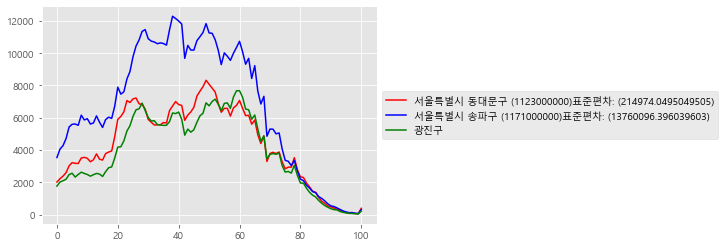

In [112]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

data = pd.read_csv("./data.csv", encoding="cp949")
# print(data)
npData = data.to_numpy()
cutData = np.delete(npData, 0, axis=0)
cutData = np.delete(cutData, 0, axis=1)
cutData = np.delete(cutData, 0, axis=1)
cutData = np.delete(cutData, 0, axis=1)
cutData = cutData.astype("int64")
baseCity = np.array(cutData[4])
baseCity = baseCity.astype("int64")
maxRate = (0,0)
minRate = (0,0)
sumRate = 0

for i in range(len(cutData)):
    if i == 4:
        continue
    tmp = cutData[i] - baseCity
    tmp = tmp * tmp
    tmp = np.sum(tmp)
    if i == 0:
        minRate = (tmp, i)
    if maxRate[0] < tmp:
        maxRate = (tmp,i)
    if minRate[0] > tmp:
        minRate = (tmp,i)

minSD = minRate[0]/101
maxSD = maxRate[0]/101

minRateData = data.iloc[minRate[1]+3, 3:104].to_numpy()
maxRateData = data.iloc[maxRate[1]+1, 3:104].to_numpy()
baseCityData = data.iloc[7, 3:104].to_numpy()
minLabel = data.iloc[minRate[1]+1, 0]
maxLabel = data.iloc[maxRate[1]+1, 0]


plt.style.use("ggplot")
plt.rc('font', family='Malgun Gothic') # Window, Colab
# plt.rc('font', family ='AppleGothic') # Mac
plt.plot(np.arange(0, 101, 1),minRateData, "r-", label = minLabel + "표준편차: ("+str(minSD)+")")
plt.plot(np.arange(0, 101, 1), maxRateData, "b-", label = maxLabel +"표준편차: ("+ str(maxSD)+")")
plt.plot(np.arange(0, 101, 1), baseCityData, "g-", label = "광진구")
plt.legend(loc="center left", ncol=1, bbox_to_anchor = (1, 0.5))
plt.show()